In [ ]:
#importing relavant packages
import numpy as np #mathemarical manipulation package
import pandas as pd #package for handling datasets
import matplotlib.pyplot as plt #package for plotting

#package for image manipulation and reading
from PIL import Image as img
from PIL import ImageOps as imgops

#other image manipulatiojn package
import cv2
from google.colab.patches import cv2_imshow

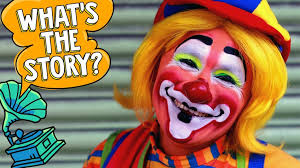

In [ ]:
#loading image and visualising
image = cv2.imread('clown.jpeg')
cv2_imshow(image)


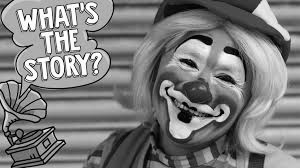

In [ ]:
#converting image to grayscale
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(imgray)

In [ ]:
#reducing noice based on given parameters
#Producing kernel:
l = 5
sig = 1.5
ax = np.linspace(-(l-1) / 2., (l-1) / 2., l)
print(ax)
xx, yy = np.meshgrid(ax, ax)
kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
kernel = kernel/ np.sum(kernel)
print(kernel)
print(np.sum(kernel))

[-2. -1.  0.  1.  2.]
[[0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.0350727  0.06831229 0.08531173 0.06831229 0.0350727 ]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]]
1.0


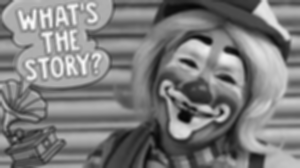

In [ ]:
#applying gaussian filter
img_nonoise = cv2.filter2D(src=imgray, ddepth=-1, kernel=kernel)
cv2_imshow(img_nonoise)

In [ ]:
#Implementing sobel operators
Gx = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
Gy = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

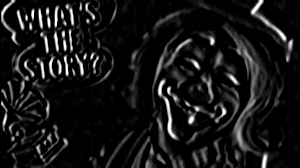

In [ ]:
img_sbx = cv2.filter2D(src=img_nonoise, ddepth=-1, kernel=Gx)
cv2_imshow(img_sbx)

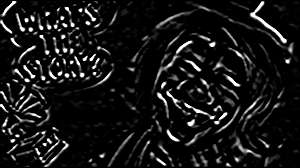

In [ ]:
img_sby = cv2.filter2D(src=img_sbx, ddepth=-1, kernel=Gy)
cv2_imshow(img_sby)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


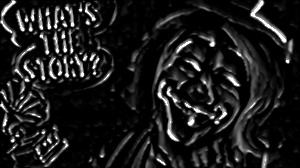

In [ ]:
#getting numeric values
mag_image = np.hypot(img_sbx, img_sby)
mag_image = 255*mag_image/np.max(mag_image)
cv2_imshow(mag_image)

In [ ]:
theta_image = np.arctan2(img_sby, img_sbx)
#plt.imshow(theta_image, cmap = 'gray')
print(mag_image)
print("\n")
print(theta_image)

[[ 0.      0.      1.415  ...  4.242   2.83    0.    ]
 [ 0.      0.7075  1.415  ...  8.55    4.53    1.415 ]
 [ 0.      2.121   2.121  ... 12.91    7.383   4.242 ]
 ...
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]]


[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 1.145 0.896 1.57 ]
 [0.    0.    0.    ... 1.405 1.279 1.57 ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


In [ ]:
# non maximum supression
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.float64)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180


    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255

               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass

    return Z


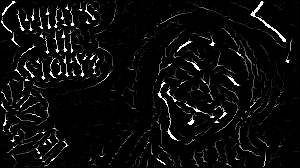

In [ ]:
sup_out = non_max_suppression(mag_image, theta_image)
cv2_imshow(sup_out)

In [ ]:
#Thresholding
def single_thresh(sup_out, mag_image):
  thresh = np.median(mag_image)
  out = sup_out.copy()
  out[out<thresh] = 0
  out[out>=thresh] = 255
  return out

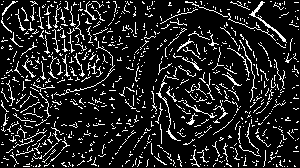

In [ ]:
final = single_thresh(sup_out, mag_image)
cv2_imshow(final)

# Gaussian kernal with sigma 3

In [ ]:
#reducing noice based on given parameters
#Producing kernel:
l = 5
sig = 3
ax = np.linspace(-(l-1) / 2., (l-1) / 2., l)
print(ax)
xx, yy = np.meshgrid(ax, ax)
kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
kernel = kernel/ np.sum(kernel)
print(kernel)
print(np.sum(kernel))

[-2. -1.  0.  1.  2.]
[[0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.03965895 0.04685151 0.04952803 0.04685151 0.03965895]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]]
0.9999999999999999


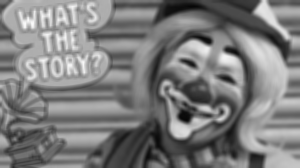

In [ ]:
#applying gaussian filter
img_nonoise = cv2.filter2D(src=imgray, ddepth=-1, kernel=kernel)
cv2_imshow(img_nonoise)

In [ ]:
#Implementing sobel operators
Gx = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
Gy = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

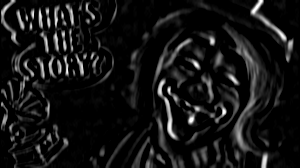

In [ ]:
img_sbx = cv2.filter2D(src=img_nonoise, ddepth=-1, kernel=Gx)
cv2_imshow(img_sbx)

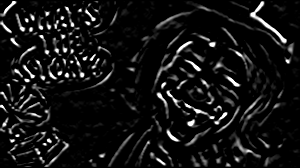

In [ ]:
img_sby = cv2.filter2D(src=img_sbx, ddepth=-1, kernel=Gy)
cv2_imshow(img_sby)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


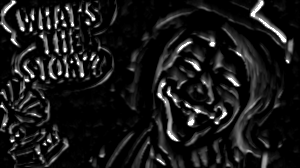

In [ ]:
#getting numeric values
mag_image = np.hypot(img_sbx, img_sby)
mag_image = 255*mag_image/np.max(mag_image)
cv2_imshow(mag_image)

In [ ]:
theta_image = np.arctan2(img_sby, img_sbx)
#plt.imshow(theta_image, cmap = 'gray')
print(mag_image)
print("\n")
print(theta_image)

[[ 0.      2.83    0.     ...  4.242   2.83    0.    ]
 [ 0.      2.83    0.7075 ...  8.55    6.707   4.242 ]
 [ 0.      3.537   2.121  ... 14.305   7.812   4.242 ]
 ...
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]
 [ 0.      0.      0.     ...  0.      0.      0.    ]]


[[0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 1.145 1.249 1.57 ]
 [0.    0.    0.    ... 1.422 1.48  1.57 ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


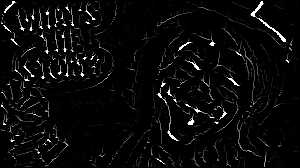

In [ ]:
sup_out = non_max_suppression(mag_image, theta_image)
cv2_imshow(sup_out)

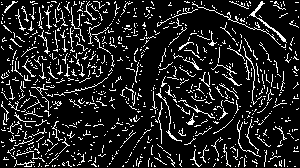

In [ ]:
final = single_thresh(sup_out, mag_image)
cv2_imshow(final)